# __Final Project Phase Three__ 
##  Mario Gonzalez, Jae Heon Kim, Johnathan Leach
## 3/31/2024

# Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Data Prep

In [18]:
# Loading the data
fifty_question = pd.read_csv('divorce_data.csv', sep = ';')
divorce_data = pd.read_csv('Marriage_Divorce_DB.csv')

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(fifty_question.drop('Divorce', axis=1), 
                                                    fifty_question['Divorce'],
                                                    test_size = 0.20,
                                                    random_state=24)

# Task at Hand

As of right now we are going to do __classification__ on the dataset with the 50 questions and do regression on the other dataset since the target is a divorce probability. This is because the 50 Questions Dataset provides a outcome of Divorced or Still married so we can classify either Married or Divorced in the end. However the other Marriage and Divorce dataset that we are forced to use because the other does not have enough entries ,(Instructed by TA to find a larger dataset), has similar questions but the target column is a divorce probability and not a divorced/married outcome. This means we will have to use Classification for one dataset and Regression for the other. This also implies that we will use accuracy as a metric for the classification and then MSE as a measure for the regression problem.

# Model 1: SVM Classification

## Training

In [19]:
# Instantiate the Model, no hyperparameters
svm = SVC(random_state=24)

# Train the Model
svm.fit(X_train, y_train)

SVC(random_state=24)

## Evaluation

In [20]:
# Getting the predictions
y_pred_svm = svm.predict(X_test)

# Checking the Results
print("Accuracy of the SVM model is ", round(accuracy_score(y_test, y_pred_svm), 4))
print("Classification Report: \n", classification_report(y_test, y_pred_svm, digits=4) )

Accuracy of the SVM model is  0.9706
Classification Report: 
               precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     1.0000    0.9333    0.9655        15

    accuracy                         0.9706        34
   macro avg     0.9750    0.9667    0.9699        34
weighted avg     0.9721    0.9706    0.9705        34



## Tuning

We are currently tuning the following hyperparameters:
 - C
 - Gamma
 - Kernel

In [21]:
# Create our parameter grid with hyperparams to optimize 
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Instantiate GridSearchCV with the SVM model and parameter grid
svm_grid_search = GridSearchCV(estimator=SVC(random_state=24), param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
svm_grid_search.fit(X_train, y_train)

# Get the best model and its predictions
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Get the best parameters and best score
print("Best Parameters:", svm_grid_search.best_params_)
print("Best Score (Cross-validated accuracy):", round(svm_grid_search.best_score_,4))


print("Classification Report: \n", classification_report(y_test, y_pred_svm, digits=4) )

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score (Cross-validated accuracy): 0.9852
Classification Report: 
               precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     1.0000    0.9333    0.9655        15

    accuracy                         0.9706        34
   macro avg     0.9750    0.9667    0.9699        34
weighted avg     0.9721    0.9706    0.9705        34



# Model 2: Random Forest Classifier

## Training

In [22]:
random_forest = RandomForestClassifier(random_state=24)

random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

## Evaluation

In [23]:
y_pred_rf = random_forest.predict(X_test)

print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.93      1.00      0.97        14

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



## Tuning

We are currently tuning the following hyperparameters:
 - C
 - Gamma
 - Kernel

In [41]:
# Create our parameter grid with hyperparams to optimize 
param_grid = {
    'n_estimators': [100,200,1000],
    'max_depth': [3, 5, 7],
    'max_leaf_nodes': [3,5,7]
}

# Instantiate GridSearchCV with the SVM model and parameter grid
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=24), param_grid=param_grid, cv=6)

# Fit GridSearchCV to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best model and its predictions
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Get the best parameters and best score
print("Best Parameters:", rf_grid_search.best_params_)
print("Best Score (Cross-validated accuracy):", round(rf_grid_search.best_score_,4))
print("Classification Report: \n", classification_report(y_test, y_pred_rf, digits=4) )

Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 3, 'n_estimators': 100}
Best Score (Cross-validated accuracy): 0.9776
Classification Report: 
               precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     1.0000    0.9333    0.9655        15

    accuracy                         0.9706        34
   macro avg     0.9750    0.9667    0.9699        34
weighted avg     0.9721    0.9706    0.9705        34



# Model 3: Logistic Regression

## Training

In [25]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

## Evaluation

In [26]:
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.93      0.97        15

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



## Tuning

In [37]:
# Create our parameter grid with hyperparams to optimize 
param_grid = {
    'C': [1,10,20],
    'tol': [1e-2, 1e-3, .01],
    'penalty': ['l2', 'l1']
}

# Instantiate GridSearchCV with the SVM model and parameter grid
lr_grid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=param_grid, cv=10)

# Fit GridSearchCV to the training data
lr_grid_search.fit(X_train, y_train)

# Get the best model and its predictions
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Get the best parameters and best score
print("Best Parameters:", lr_grid_search.best_params_)
print("Best Score (Cross-validated accuracy):", round(lr_grid_search.best_score_,4))
print("Classification Report: \n", classification_report(y_test, y_pred_lr, digits=4) )

Best Parameters: {'C': 1, 'penalty': 'l2', 'tol': 0.01}
Best Score (Cross-validated accuracy): 0.9775
Classification Report: 
               precision    recall  f1-score   support

           0     0.9474    0.9474    0.9474        19
           1     0.9333    0.9333    0.9333        15

    accuracy                         0.9412        34
   macro avg     0.9404    0.9404    0.9404        34
weighted avg     0.9412    0.9412    0.9412        34



# Graphs

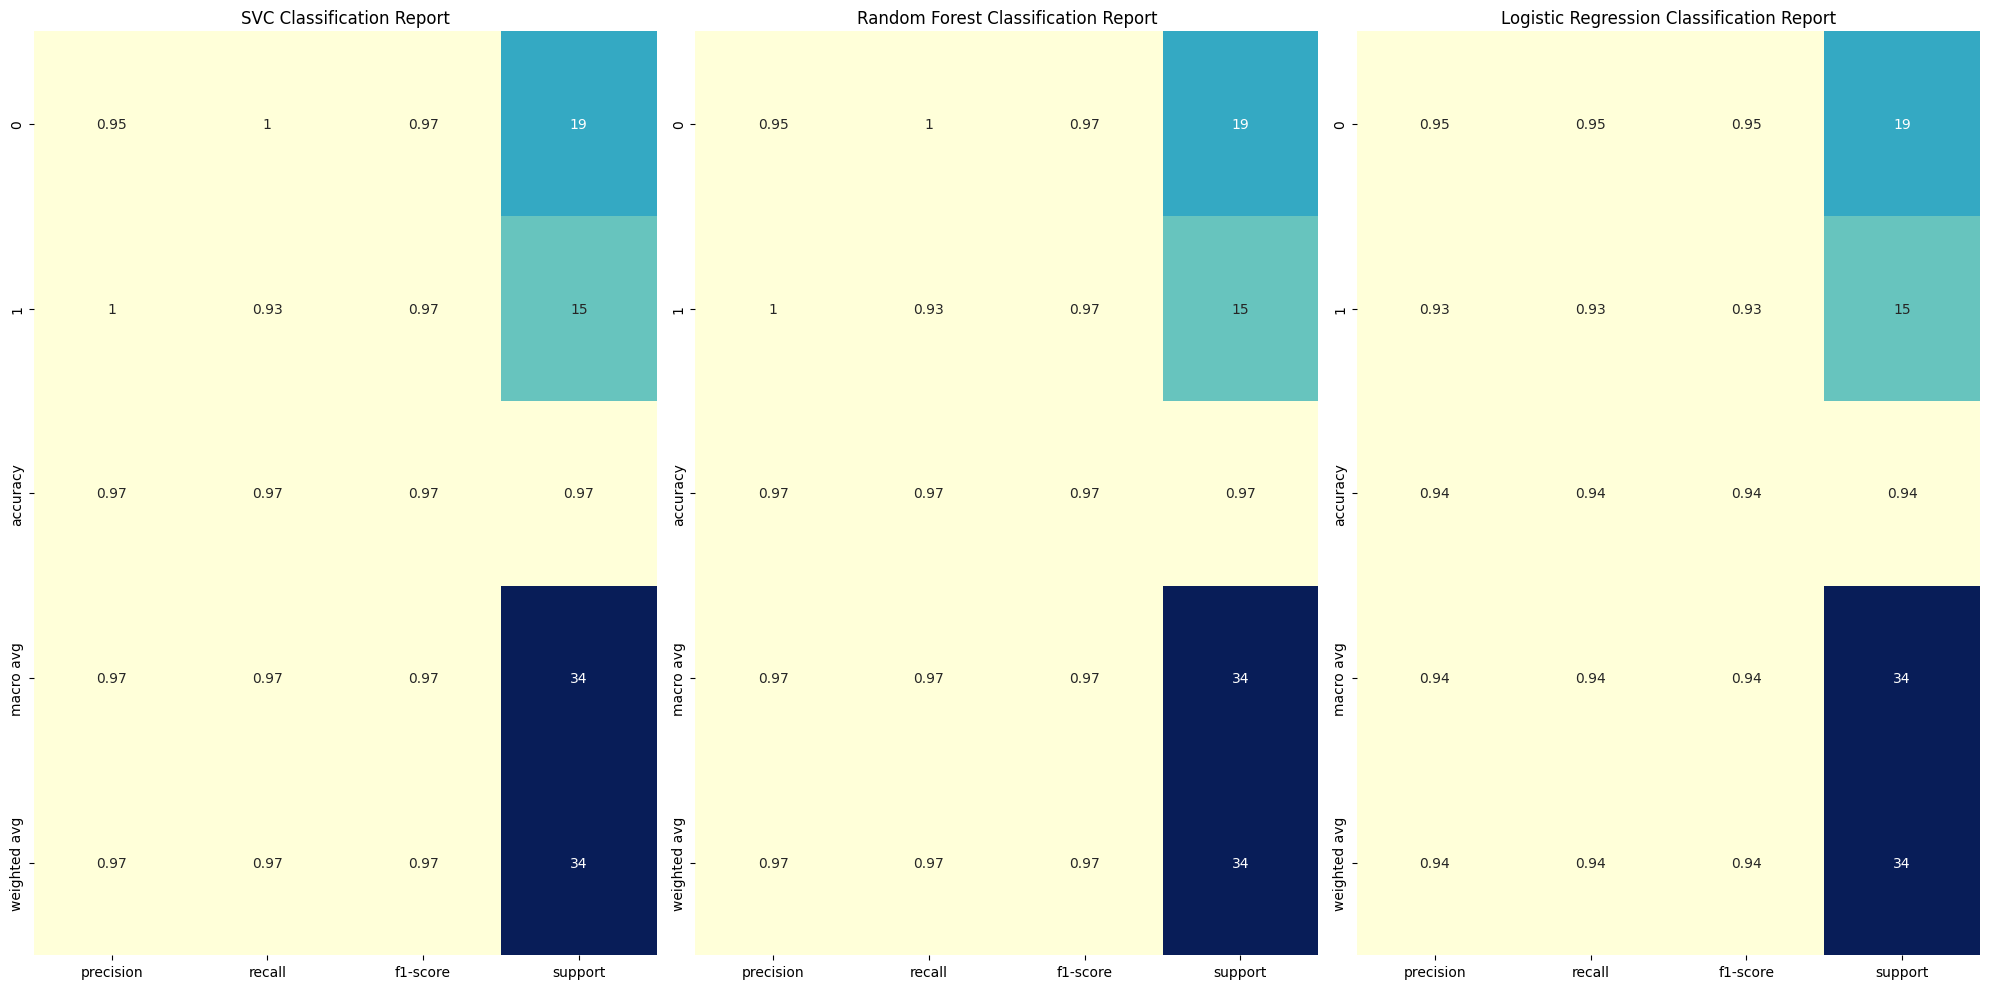

In [43]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot SVC classification report
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred_svm, output_dict=True, digits=4)).T, ax=axes[0], annot=True, cmap="YlGnBu", cbar=False)
axes[0].set_title('SVC Classification Report')

# Plot Random Forest classification report
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True, digits=4)).T, ax=axes[1], annot=True, cmap="YlGnBu", cbar=False)
axes[1].set_title('Random Forest Classification Report')

# Plot Logistic Regression classification report
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True, digits=4)).T, ax=axes[2], annot=True, cmap="YlGnBu", cbar=False)
axes[2].set_title('Logistic Regression Classification Report')

plt.tight_layout()
plt.show()